In [90]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths
from skimage.restoration import denoise_bilateral,denoise_wavelet,denoise_tv_chambolle,estimate_sigma

[  0   1   2   3   4   5   7   8   9  10  11  12  14  15  16  17  18  20
  21  22  23  24  25  27  28  29  30  31  33  34  35  36  37  38  40  41
  42  43  44  46  47  48  49  50  51  53  54  55  56  57  59  60  61  62
  63  64  66  67  68  69  70  72  73  74  75  76  77  79  80  81  82  83
  85  86  87  88  89  90  92  93  94  95  96  97  99 100 101 102 103 105
 106 107 108 109 110 112 113 114 115 116 118 119 120 121 122 123 125 126
 127 128 129 131 132 133 134 135 136 138 139 140 141 142 144 145 146 147
 148 149 151 152 153 154 155 157 158 159 160 161 162 164 165 166 167 168
 170 171 172 173 174 175 177 178 179 180 181 182 184 185 186 187 188 190
 191 192 193 194 195 197 198 199 200 201 203 204 205 206 207 208 210 211
 212 213 214 216 217 218 219 220 221 223 224 225 226 227 229 230 231 232
 233 234 236 237 238 239 240 242 243 244 245 246 247 249 250 251 252 253
 255]


([], <a list of 0 Text yticklabel objects>)

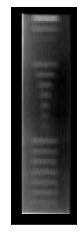

In [91]:
npImage=np.array(Image.open("./denoisedImage_1.png").convert("L"))

# Get brightness range - i.e. darkest and lightest pixels
min=np.min(npImage)        # result=144
max=np.max(npImage)        # result=216

# Make a LUT (Look-Up Table) to translate image values
LUT=np.zeros(256,dtype=np.uint8)
LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True,dtype=np.uint8)
print(LUT[min:max+1])
# Apply LUT and save resulting image
contrastedImg =np.array(Image.fromarray(LUT[npImage]))
plt.imshow(contrastedImg,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [92]:
print(contrastedImg.shape[0],contrastedImg.shape[1],sep=" ")

314 94


In [93]:
middle_col_1 = (int) (contrastedImg.shape[1]/2)
print(middle_col_1)

47


In [94]:
middle_col_img = np.array(contrastedImg[:,middle_col_1-2:middle_col_1+2])
print(middle_col_img.ndim)
plt.imshow(middle_col_img,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

2


([], <a list of 0 Text yticklabel objects>)

In [95]:
middle_col_img_avg = np.average(middle_col_img,axis=1)
print(middle_col_img_avg.ndim,sep=" ")

1


In [96]:
#finding peaks
min_peak_height = 40
max_peak_height = 200
peaks = find_peaks(middle_col_img_avg,height=(min_peak_height,max_peak_height),distance=10,prominence=5)
print(peaks[0])

[ 17  32  46  84  97 113 128 143 158 172 193 209 224 239 253 268 282 298]


In [97]:
#find width
results_half = peak_widths(middle_col_img_avg, peaks[0], rel_height=0.4)
print(*results_half[1:])

[105.3   84.55  63.3   67.1   60.35  56.6   56.05  54.05  49.    51.2
  69.9   68.9   70.95  77.7   79.    83.15  86.15 101.55] [ 12.89417476  28.6         43.775       79.86153846  94.73793103
 109.26666667 124.43030303 139.23225806 154.6        167.92941176
 190.01935484 205.93142857 220.38571429 235.592      250.33333333
 265.37333333 280.4        294.58095238] [ 21.18550725  35.52857143  50.1         87.06842105 101.225
 116.52       131.40689655 146.03076923 161.07142857 176.76666667
 197.33548387 212.27142857 227.04137931 242.00769231 257.26086957
 270.68888889 285.06666667 298.4       ]


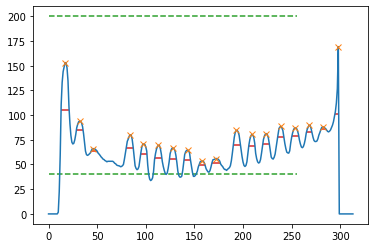

In [98]:
plt.plot(middle_col_img_avg)
plt.hlines(max_peak_height,0,255,colors="C2",linestyles="dashed")
plt.hlines(min_peak_height,0,255,colors="C2",linestyles="dashed")
plt.hlines(*results_half[1:], color="C3")
plt.plot(peaks[0],middle_col_img_avg[peaks[0]],'x')
#plt.plot(results_half[2],results_half[1],'P')

#plt.plot(results_half[3],results_half[1],'^')